In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [42]:
df=pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [43]:
df.shape

(200, 4)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [45]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [46]:
display(df.isnull().sum())

,0
TV,0
Radio,0
Newspaper,0
Sales,0


***Visualisation***


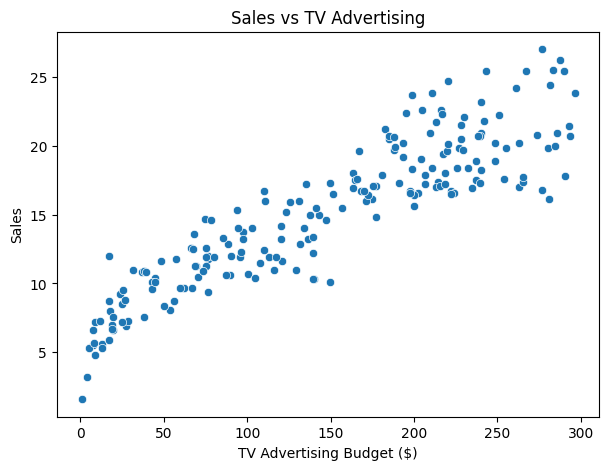

In [47]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='TV', y='Sales', data=df)
plt.title('Sales vs TV Advertising')
plt.xlabel('TV Advertising Budget ($)')
plt.ylabel('Sales')
plt.show()


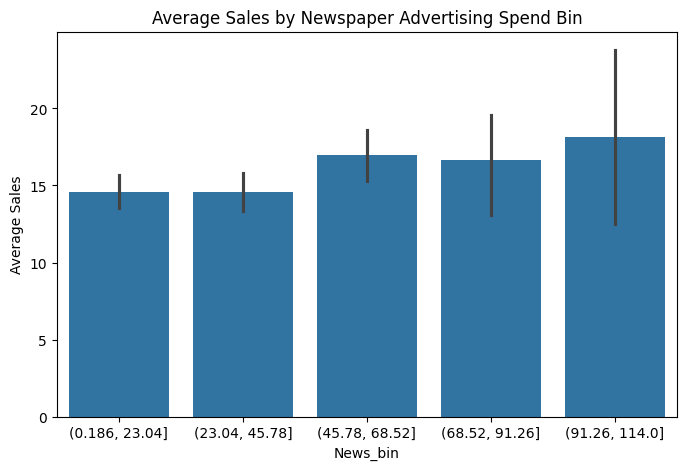

In [48]:
df['News_bin'] = pd.cut(df['Newspaper'], bins=5)

plt.figure(figsize=(8,5))
sns.barplot(x='News_bin', y='Sales', data=df)
plt.title("Average Sales by Newspaper Advertising Spend Bin")
plt.ylabel("Average Sales")
plt.show()


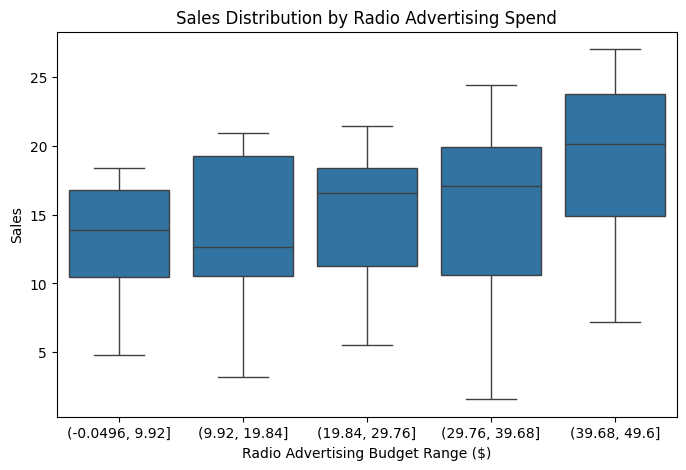

In [49]:

df['Radio_bin'] = pd.cut(df['Radio'], bins=5)

plt.figure(figsize=(8, 5))
sns.boxplot(x='Radio_bin', y='Sales', data=df)
plt.title('Sales Distribution by Radio Advertising Spend')
plt.xlabel('Radio Advertising Budget Range ($)')
plt.ylabel('Sales')
plt.show()


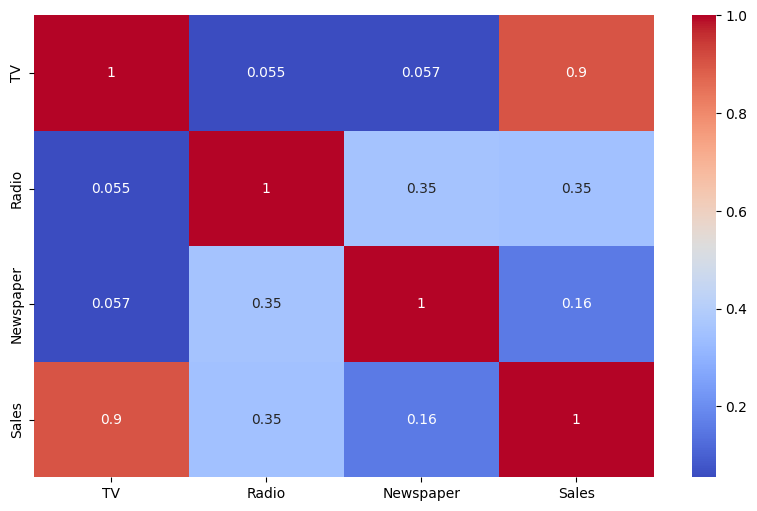

In [61]:
import seaborn as sns
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [63]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv("advertising.csv")
X = df[['TV', 'Radio']].values
y = df['Sales'].values

# Normalize features
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Add bias term (column of 1s for bias weight)
X = np.c_[np.ones(X.shape[0]), X]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize weights
def initialize_weights(n_features):
    return np.zeros(n_features)

# --------- Batch Gradient Descent ---------
def train_batch(X, y, lr=0.01, epochs=1000):
    m, n = X.shape
    weights = initialize_weights(n)
    for epoch in range(epochs):
        y_pred = X.dot(weights)
        error = y_pred - y
        gradient = (2/m) * X.T.dot(error)
        weights -= lr * gradient

        if epoch % 100 == 0:
            mse = np.mean(error ** 2)
            print(f"[Batch] Epoch {epoch}: MSE = {mse:.4f}")
    return weights

# --------- Stochastic Gradient Descent ---------
def train_online(X, y, lr=0.01, epochs=10):
    m, n = X.shape
    weights = initialize_weights(n)
    for epoch in range(epochs):
        for i in range(m):
            xi = X[i].reshape(1, -1)
            yi = y[i]
            y_pred = xi.dot(weights)
            error = y_pred - yi
            gradient = 2 * xi.T.dot(error)
            weights -= lr * gradient.ravel()

        y_pred_all = X.dot(weights)
        mse = np.mean((y - y_pred_all) ** 2)
        print(f"[Online] Epoch {epoch}: MSE = {mse:.4f}")
    return weights

# --------- Prediction & Evaluation ---------
def evaluate(X_test, y_test, weights, name="Model"):
    y_pred = X_test.dot(weights)
    mse = np.mean((y_test - y_pred) ** 2)
    print(f"{name} Test MSE: {mse:.4f}")
    return y_pred

In [64]:
# Train both models
print("=== Training with Batch Gradient Descent ===")
batch_weights = train_batch(X_train, y_train, lr=0.01, epochs=1000)

print("\n=== Training with Stochastic Gradient Descent ===")
online_weights = train_online(X_train, y_train, lr=0.01, epochs=10)

# Evaluate on test data
print("\n=== Evaluating on Test Set ===")
evaluate(X_test, y_test, batch_weights, name="Batch GD")
evaluate(X_test, y_test, online_weights, name="Online GD")


=== Training with Batch Gradient Descent ===
[Batch] Epoch 0: MSE = 261.8274
[Batch] Epoch 100: MSE = 6.9924
[Batch] Epoch 200: MSE = 2.7556
[Batch] Epoch 300: MSE = 2.6840
[Batch] Epoch 400: MSE = 2.6827
[Batch] Epoch 500: MSE = 2.6827
[Batch] Epoch 600: MSE = 2.6827
[Batch] Epoch 700: MSE = 2.6827
[Batch] Epoch 800: MSE = 2.6827
[Batch] Epoch 900: MSE = 2.6827

=== Training with Stochastic Gradient Descent ===
[Online] Epoch 0: MSE = 3.0343
[Online] Epoch 1: MSE = 2.6958
[Online] Epoch 2: MSE = 2.6943
[Online] Epoch 3: MSE = 2.6943
[Online] Epoch 4: MSE = 2.6943
[Online] Epoch 5: MSE = 2.6943
[Online] Epoch 6: MSE = 2.6943
[Online] Epoch 7: MSE = 2.6943
[Online] Epoch 8: MSE = 2.6943
[Online] Epoch 9: MSE = 2.6943

=== Evaluating on Test Set ===
Batch GD Test MSE: 2.8466
Online GD Test MSE: 2.8104


array([16.95596441, 20.44443315, 23.81244457,  9.08793893, 21.96642783,
       12.41188438, 21.23214014,  8.54011512, 17.25772724, 16.64906267,
        8.88720419,  8.26048509, 17.93048081,  7.99691192, 12.51096343,
       14.82104953,  7.91207225, 17.98470788, 10.86742852, 20.64201692,
       20.71072422, 12.17532263, 10.90999796, 22.34500305,  9.3531156 ,
        7.71882705, 20.95342257, 13.81202989, 10.62957962,  7.87799233,
       15.91652209, 10.54943607, 20.81892781, 10.09664222, 21.61030176,
       21.40608255, 12.19167639, 22.80842767, 12.60444594,  6.23091229])